Install the requirements:

In [1]:
!pip install torch
!pip install torchvision

Download the object detection image:

In [2]:
import requests
import os.path

image_file_path = 'source_2.png'
if not os.path.isfile(image_file_path):
    url = 'https://github.com/ivan-vasilev/Python-Deep-Learning-3rd-Edition/blob/main/Chapter05/source_2.png?raw=true'
    r = requests.get(url)
    with open(image_file_path, 'wb') as f:
        f.write(r.content)

Load the PyTorch model with ResNet50 backbone:

In [3]:
from torchvision.models.detection import \
    FasterRCNN_ResNet50_FPN_V2_Weights, \
    fasterrcnn_resnet50_fpn_v2

model = fasterrcnn_resnet50_fpn_v2(
    weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

# set the model in evaluation mode
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:02<00:00, 68.8MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

Read the image file:

In [4]:
import cv2

img = cv2.imread(image_file_path)

Transform the input to tensor:

In [5]:
import torchvision.transforms as transforms

transform = transforms.ToTensor()

nn_input = transform(img)

Run the detection:

In [6]:
detected_objects = model([nn_input])
print(detected_objects)

[{'boxes': tensor([[ 646.3348,  527.0721, 1241.4507,  780.8930],
        [ 384.2202,  300.6204, 1172.3641,  684.0071],
        [ 712.9886,  577.0475,  767.2746,  601.6299],
        [ 224.4359,  368.7996,  262.6234,  467.7628],
        [ 221.1813,  490.7824,  234.5213,  515.3698],
        [ 720.7554,  471.8842,  774.4617,  539.9887],
        [ 828.7346,  570.7820,  897.8793,  630.0005],
        [  19.5787,  499.2324,   34.2166,  519.5320],
        [ 495.5461,  304.9112, 1176.3907,  612.2183],
        [1167.3901,  165.6963, 1280.0000,  669.5685],
        [ 819.0773,  568.9913,  854.0623,  610.6670],
        [  55.7448,  560.1816,   75.1376,  580.4487],
        [ 610.3933,  477.0418, 1249.0751,  771.4399],
        [ 249.0713,  374.6896,  263.8229,  461.6749],
        [ 734.7130,  577.5893,  767.4855,  596.2109],
        [ 367.9105,  317.5650,  804.8801,  682.3389],
        [ 181.1504,  366.8589,  262.3268,  470.2812],
        [ 426.4714,  481.1504,  440.0844,  498.6542],
        [ 180.608

Display the bounding boxes with the `draw_bboxes` helper function:

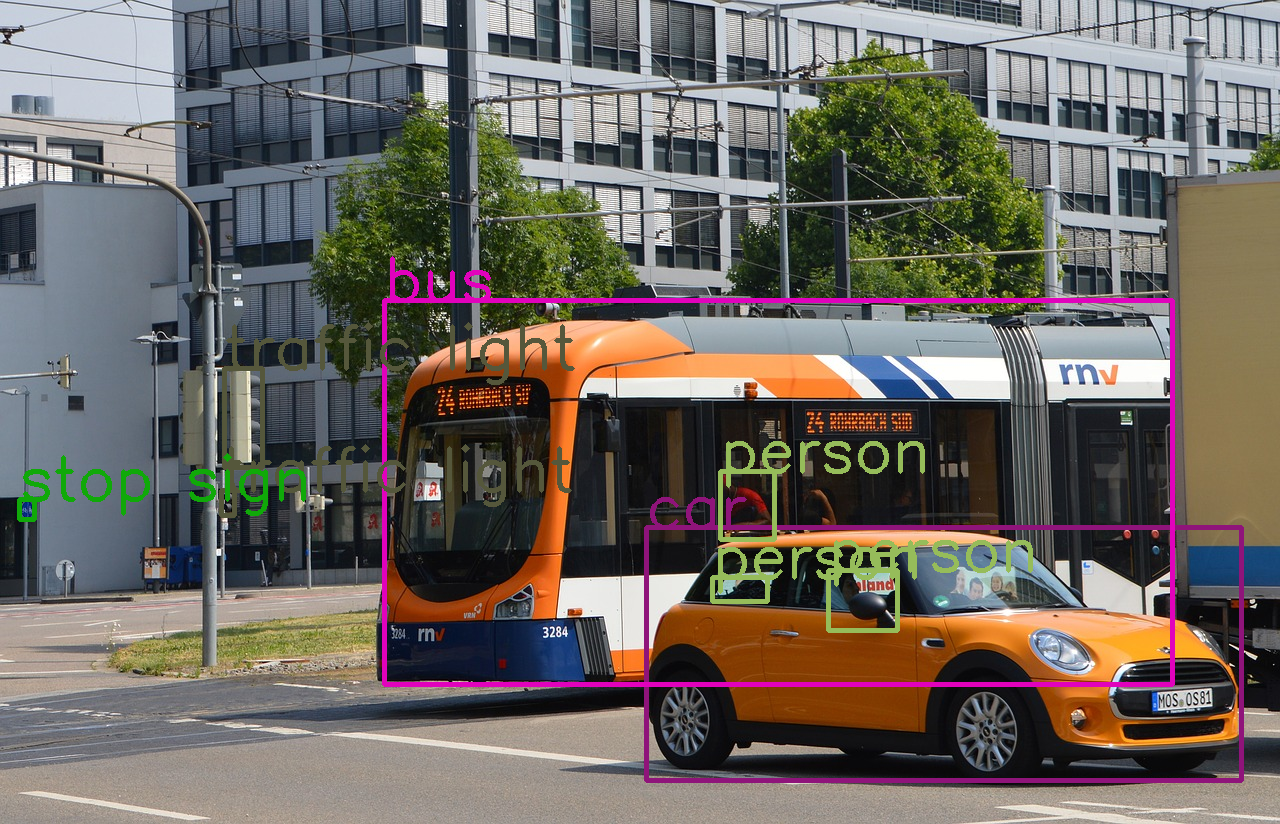

In [7]:
import numpy as np
from google.colab.patches import cv2_imshow

def draw_bboxes(image: np.array, det_objects: dict):
    """Draw bounding boxes and predicted classes"""
    # COCO dataset class names
    classes = [
        'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
        'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
        'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
        'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
        'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
        'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
        'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
        'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
        'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
        'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

    import numpy as np
    # random color for each class

    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    # iterate over the network output for all boxes
    for box, box_class, score in zip(det_objects[0]['boxes'].detach().numpy().astype(int),
                                     det_objects[0]['labels'].detach().numpy(),
                                     det_objects[0]['scores'].detach().numpy()):

        # filter the boxes by objectness score
        if score > 0.5:
            # transform bounding box format
            box = [(box[0], box[1]), (box[2], box[3])]

            # draw the bounding box
            cv2.rectangle(img=image,
                          pt1=box[0],
                          pt2=box[1],
                          color=colors[box_class],
                          thickness=4)

            # display the box class label
            cv2.putText(img=image,
                        text=classes[box_class],
                        org=box[0],
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=2,
                        color=colors[box_class],
                        thickness=4)

draw_bboxes(img, detected_objects)
cv2_imshow(img)